### K Nearest Neighbors with Python
You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read the data


In [10]:
df = pd.read_csv ('E:\AI_ML_Self_CodesAndProjects\Classified_Data.csv', index_col = 0) # Setting the first column as index

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [15]:
# Fit and transform the DataFrame using MinMaxScaler
normalized_data = scaler.fit_transform(df.drop('TARGET CLASS',axis=1)) # Not using the target class to fit the data to scaler.

In [17]:
# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.columns[:-1]) # Converting everything back to dataframe except last one

In [18]:
normalized_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463


In [19]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [20]:
normalized_df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463
...,...,...,...,...,...,...,...,...,...,...
995,0.540622,0.425615,0.439613,0.363198,0.540406,0.230579,0.318439,0.013646,0.494684,0.565135
996,0.259226,0.369436,0.496785,0.470391,0.823357,0.717082,0.536417,0.278421,0.390341,0.816257
997,0.621092,0.388595,0.393724,0.548295,0.438829,0.443107,0.064574,0.060641,0.364369,0.594624
998,0.588408,0.301913,0.152232,0.390393,0.968955,0.485200,0.395298,0.512713,0.599986,0.437207


### Train Test split

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data,df['TARGET CLASS'],test_size=0.30)

### Using KNN
Remember that we are trying to come up with a model to predict TARGET CLASS or not. We'll start with k=1.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [31]:
pred = knn.predict(X_test)

### Predictions and Evaluations
Let's evaluate our KNN model!
Accuracy evaluation

In [32]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.9233333333333333


Ofcourse it gave too high a train accuracy as k was used as 1

### Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [33]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [34]:
print(error_rate)

[0.07666666666666666, 0.06333333333333334, 0.08333333333333333, 0.056666666666666664, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.05333333333333334, 0.07333333333333333, 0.06333333333333334, 0.07666666666666666, 0.06666666666666667, 0.07333333333333333, 0.06, 0.06333333333333334, 0.06333333333333334, 0.07, 0.06, 0.06666666666666667, 0.06, 0.07, 0.06, 0.06, 0.05333333333333334, 0.06, 0.05333333333333334, 0.056666666666666664, 0.04666666666666667, 0.04666666666666667, 0.043333333333333335, 0.05, 0.04666666666666667, 0.05333333333333334, 0.05, 0.05333333333333334, 0.05, 0.056666666666666664, 0.05333333333333334, 0.06]


Text(0, 0.5, 'Error Rate')

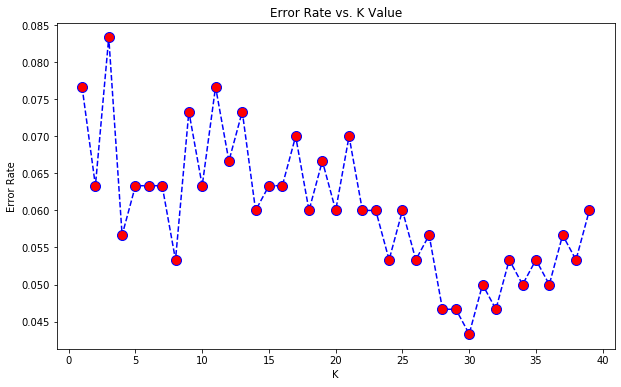

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
# Lowest error rate value and index(essentially value of k)
print(min(error_rate))
print(error_rate.index(min(error_rate)))

0.043333333333333335
29


So, now let's use the value of k as 29

In [41]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [42]:
# Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy:  0.9371428571428572
Test set Accuracy:  0.9533333333333334


#### Using the Confusion Matrix

In [44]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[149,  10],
       [  4, 137]], dtype=int64)

In [50]:
# Classification report card using Confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       159
           1       0.93      0.97      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



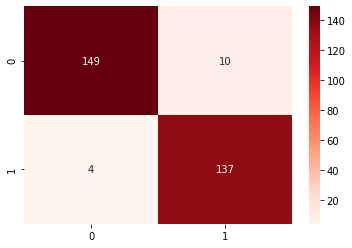

In [56]:
# Plotting the Confusion matrix for visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay

matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=df['TARGET CLASS'])

sns.heatmap(cm, annot=True,fmt="d",cmap='Reds')